In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

### 자료 내려받기

In [2]:
region_all = pd.read_excel("Re_t_new_merge.xlsx")
region_all.head()

,Unnamed: 0,특허건수_2019,특허건수_2020,특허건수_2021,노인천명당 노인여가복지시설수,녹지율,독거노인가구비율,빈집비율,걷기실천율,비만유병률,...,유출인구_2021,순이동_2021,2022_투표자,야당득표_2022,야당비율_2022,2018_유권자,2022_유권자,2018_투표율,2022_투표율,50_pop
0,서울종로구,1184,1279,1539,1.9,46.74,8.2,4.4,45.3,32.6,...,24428,2224,100629,53236,0.535757,134963.0,129968,0.601609,0.774260,0.438274
1,서울중구,1401,1584,1611,1.6,0.25,8.9,3.9,55.3,28.6,...,21126,1209,84998,45940,0.545709,112336.0,111448,0.591743,0.762670,0.433161
2,서울용산구,688,704,881,2.0,40.64,7.0,5.4,53.8,25.4,...,39572,3561,152068,90619,0.601392,200009.0,199077,0.580244,0.763865,0.407905
3,서울성동구,777,854,1066,2.6,25.78,6.5,2.4,51.3,30.7,...,46075,6244,197240,110827,0.567651,264634.0,252087,0.596533,0.782428,0.399190
4,서울광진구,548,599,593,1.4,30.89,5.8,1.2,55.8,29.1,...,56750,5228,235471,122996,0.528066,308174.0,303582,0.585296,0.775642,0.383165


In [3]:
region_all.index = region_all['Unnamed: 0']

### 자료 가공 작업

- 변수 추가 작업

In [4]:
region_all['대졸자합'] = region_all[['대학교(4년제이상)_pop','대학원석사과정_pop','대학원박사과정_pop']].sum(axis=1)
region_all['통근통학1시간미만'] = region_all[['통근통학15_pop','통근통학3045_pop','통근통학4560_pop']].sum(axis=1)
region_all['첨단산업_pop'] = region_all[['K.금융및보험업_pop', 'M.전문,과학및기술서비스업_pop', 'J.정보통신업_pop']].sum(axis=1)
region_all['공공기관_pop'] = region_all[['O.공공행정,국방및사회보장행정_pop','U.국제및외국기관_pop']].sum(axis=1)
region_all['생활서비스업_부가가치'] = region_all[['교육서비스업_부가가치', '보건사회복지서비스업_부가가치','숙박음식점업_부가가치', '문화및기타서비스업_부가가치']].sum(axis=1)
region_all['특허3개년평균'] = region_all[['특허건수_2019', '특허건수_2020','특허건수_2021']].sum(axis=1)/3

- 비율화 작업 (전체 인구 혹은 부가가치 대비)

In [5]:
list_for_fix = ['65_pop','A.농업,임업및어업_pop','C.제조업_pop','통근통학1시간미만','대졸자합','첨단산업_pop',
                '공공기관_pop','유입인구_2021','유출인구_2021','순이동_2021']

for i in list_for_fix :
    try :
        region_all[i] = region_all[i]/region_all['total_pop']
    except TypeError as e :
        print(f"Error: {e}", i)

In [6]:
list_for_fix2 = ['제조업_부가가치', '생활서비스업_부가가치']

for i in list_for_fix2 :
    try :
        region_all[i] = region_all[i]/region_all['총부가가치']
    except TypeError as e :
        print(f"Error: {e}", i)

region_all.head()

,Unnamed: 0,특허건수_2019,특허건수_2020,특허건수_2021,노인천명당 노인여가복지시설수,녹지율,독거노인가구비율,빈집비율,걷기실천율,비만유병률,...,2022_유권자,2018_투표율,2022_투표율,50_pop,대졸자합,통근통학1시간미만,첨단산업_pop,공공기관_pop,생활서비스업_부가가치,특허3개년평균
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
서울종로구,서울종로구,1184,1279,1539,1.9,46.74,8.2,4.4,45.3,32.6,...,129968,0.601609,0.774260,0.438274,0.447302,0.333508,0.092753,0.026791,0.106629,1334.000000
서울중구,서울중구,1401,1584,1611,1.6,0.25,8.9,3.9,55.3,28.6,...,111448,0.591743,0.762670,0.433161,0.392978,0.339997,0.102383,0.020822,0.067949,1532.000000
서울용산구,서울용산구,688,704,881,2.0,40.64,7.0,5.4,53.8,25.4,...,199077,0.580244,0.763865,0.407905,0.482881,0.348025,0.120670,0.029528,0.137127,757.666667
서울성동구,서울성동구,777,854,1066,2.6,25.78,6.5,2.4,51.3,30.7,...,252087,0.596533,0.782428,0.399190,0.428462,0.363554,0.113513,0.018480,0.167136,899.000000
서울광진구,서울광진구,548,599,593,1.4,30.89,5.8,1.2,55.8,29.1,...,303582,0.585296,0.775642,0.383165,0.389013,0.350266,0.102415,0.018323,0.338106,580.000000


In [7]:
pd.set_option('display.max_colwidth', None)
print(region_all.columns.values)

['Unnamed: 0' '특허건수_2019' '특허건수_2020' '특허건수_2021' '노인천명당 노인여가복지시설수' '녹지율'
 '독거노인가구비율' '빈집비율' '걷기실천율' '비만유병률' '보건기관이용률' '인플루엔자_예방접종률' '우울감_경험률' '흡연율'
 '의료인력현황' '유아천명당 보육시설수' '1인당생활폐기물' '화재발생건수' '사회복지예산비중' '천명당의료기관병상수'
 'total_pop' '1564_pop' '65_pop' '남성_pop' '내국인_pop' 'Forei_pop_rati'
 '통근통학_total_pop' '통근통학15_pop' '통근통학1530_pop' '통근통학3045_pop'
 '통근통학4560_pop' '통근통학6090_pop' '통근통학90120_pop' '통근통학120_pop'
 '대학(4년제미만)_pop' '대학교(4년제이상)_pop' '대학원석사과정_pop' '대학원박사과정_pop' '고졸이하_pop'
 '직종_관리자_pop' '직종_전문가관련_pop' '직종_사무_pop' '직종_서비스_pop' '직종_판매_pop'
 '직종_농림어업숙련_pop' '직종_기능원관련_pop' '직종_장치기계조작조립_pop' '직종_단순노무_pop'
 '직종_기타_pop' 'A.농업,임업및어업_pop' 'B.광업_pop' 'C.제조업_pop'
 'D.전기,가스,증기및공기조절공급업_pop' 'E.수도,하수및폐기물처리,원료재생업_pop' 'F.건설업_pop'
 'G.도매및소매업_pop' 'H.운수업및창고업_pop' 'I.숙박및음식점업_pop' 'J.정보통신업_pop'
 'K.금융및보험업_pop' 'L.부동산업_pop' 'M.전문,과학및기술서비스업_pop'
 'N.사업시설관리,사업지원및임대서비스업_pop' 'O.공공행정,국방및사회보장행정_pop' 'P.교육서비스업_pop'
 'Q.보건업및사회복지서비스업_pop' 'R.예술,스포츠및여가관련서비스업_pop' 'S.협회및단체,수리및기타개인서비스업_pop'
 'T.가구내고용활동및달리분류되지않은자가

- 필요한 데이터 추리기

In [8]:
data_for_test = region_all[['걷기실천율','비만유병률','보건기관이용률','인플루엔자_예방접종률','우울감_경험률','흡연율','의료인력현황','병·의원_도보대중교통_30분_이내_pop_ratio',
                            '65_pop','독거노인가구비율','대졸자합','노인천명당 노인여가복지시설수',
                            '유아천명당 보육시설수','사회복지예산비중','천명당의료기관병상수','중학교_도보대중교통_30분_이내_pop_ratio','고등학교_도보대중교통_30분_이내_pop_ratio','초등학교_도보대중교통_30분_이내_pop_ratio',
                            'A.농업,임업및어업_pop','C.제조업_pop','첨단산업_pop','공공기관_pop','농업어업임업_부가가치','제조업_부가가치','생활서비스업_부가가치','특허3개년평균','1인당_자동차등록대수','사업체수',
                            '노후주택비율','빈집비율',
                            '실업률','청년고용률_2022.1/2','재정자립도(세입과목개편후)',
                            '녹지율','1인당생활폐기물','인구십만명당_문화기반시설수',
                            '도로포장률','철도역_도보대중교통_30분_이내_pop_ratio','통근통학1시간미만',
                            '순이동_2021','화재발생건수',]]

### 결측값 및 inf값 처리

In [9]:
data_for_test[['농업어업임업_부가가치']] = data_for_test[['농업어업임업_부가가치']].fillna(0)

c:\Users\Popperkim\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [10]:
data_for_test.fillna(data_for_test.mean(), inplace = True)

c:\Users\Popperkim\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


### 분석 진행을 위한 자료 표준화

In [164]:
for column in data_for_test.columns:
    data_for_test[column] = (data_for_test[column]-data_for_test[column].mean()) / data_for_test[column].std()

data_for_test.head()

C:\Users\Popperkim\AppData\Local\Temp\ipykernel_4204\1547192097.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_test[column] = (data_for_test[column]-data_for_test[column].mean()) / data_for_test[column].std()


,걷기실천율,비만유병률,보건기관이용률,인플루엔자_예방접종률,우울감_경험률,흡연율,의료인력현황,병·의원_도보대중교통_30분_이내_pop_ratio,65_pop,독거노인가구비율,대졸자합,노인천명당 노인여가복지시설수,유아천명당 보육시설수,사회복지예산비중,천명당의료기관병상수,중학교_도보대중교통_30분_이내_pop_ratio,고등학교_도보대중교통_30분_이내_pop_ratio,초등학교_도보대중교통_30분_이내_pop_ratio,"A.농업,임업및어업_pop",C.제조업_pop,첨단산업_pop,공공기관_pop,농업어업임업_부가가치,제조업_부가가치,생활서비스업_부가가치,특허3개년평균,1인당_자동차등록대수,사업체수,노후주택비율,빈집비율,실업률,청년고용률_2022.1/2,재정자립도(세입과목개편후),녹지율,1인당생활폐기물,인구십만명당_문화기반시설수,도로포장률,철도역_도보대중교통_30분_이내_pop_ratio,통근통학1시간미만,순이동_2021,화재발생건수
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울종로구,0.480759,-0.514740,-0.395576,-1.401052,-0.454929,-0.644873,2.075486,0.857058,-0.613152,-0.698624,2.218180,-0.938641,1.228578,0.289984,1.023823,0.800405,0.849704,0.715733,-0.842636,-0.425750,1.868579,-0.415597,-0.407666,-0.351360,-0.374099,0.937516,-0.660612,0.888245,-0.031894,-1.093420,-0.968551,0.128031,2.438759,-0.840868,0.492846,3.216808,0.696021,1.215581,0.205112,0.244509,0.327889
서울중구,1.432056,-1.567905,-0.804652,0.727179,0.906598,-0.678899,0.442752,0.857058,-0.549880,-0.578010,1.632633,-0.980344,0.280420,0.243574,-0.500906,0.800405,0.849704,0.715733,-0.839175,-0.221238,2.208499,-0.612999,-0.425042,-0.349548,-0.406768,1.146416,-0.254629,1.780935,-0.779120,-1.191437,-0.998509,0.102985,3.145286,-3.030223,1.923121,1.152817,0.696021,1.447377,0.383772,-0.139544,0.124166
서울용산구,1.289362,-2.410437,-0.686649,-0.096005,0.159954,-0.508766,-0.013584,0.857058,-0.759840,-0.905389,2.601684,-0.924740,-0.380417,0.866796,-1.170550,0.800405,0.849704,0.715733,-0.839180,-0.759271,2.854006,-0.325075,-0.403247,-0.353164,-0.348340,0.329452,-1.066595,0.128398,0.085318,-0.897387,-0.459278,0.679044,1.959018,-1.128135,-0.157279,-0.397469,0.696021,1.447377,0.604819,0.324813,0.172671
서울성동구,1.051537,-1.014993,-1.040658,0.486248,0.906598,-1.325407,0.299036,0.857058,-0.805175,-0.991541,2.015108,-0.841335,-0.753934,0.468995,-0.902693,0.800405,0.849704,0.715733,-0.839408,-0.408352,2.601387,-0.690439,-0.424316,-0.321431,-0.322994,0.478567,-0.660612,0.615886,-0.808423,-1.485487,-0.923616,0.378492,1.217601,-1.827938,-0.547354,-0.617628,0.696021,1.447377,1.032386,0.734938,0.318188
서울광진구,1.479621,-1.436259,-1.079992,-0.096005,0.511316,-1.019166,0.553873,0.857058,-0.936692,-1.112154,1.589899,-1.008145,0.194224,1.151888,-0.789368,0.800405,0.849704,0.715733,-0.837758,-0.529944,2.209613,-0.695627,-0.424863,-0.346147,-0.178594,0.142004,-1.066595,0.292155,-0.625279,-1.720726,-0.758851,1.154919,0.598299,-1.587293,-0.547354,-0.801094,0.696021,1.443019,0.666519,0.253198,0.454004


In [165]:
data_for_test.to_excel("final_data.xlsx")  ##활용할 최종 데이터 추출

### 변수 간 상관관계

In [166]:
pd.set_option('mode.use_inf_as_na', True)

In [167]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set the font path and name
font_path = 'C:/Windows/Fonts/gulim.ttc'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_name

In [168]:
import seaborn as sns
cor_mat = data_for_test.iloc[:,0:].corr()
plt.figure(figsize=(100, 100))
sns.heatmap(cor_mat, annot=True, cmap='RdYlGn_r')
plt.show()

### 테스트에 활용한 변수들의 분포

array([[<AxesSubplot:title={'center':'비만유병률'}>,
        <AxesSubplot:title={'center':'보건기관이용률'}>,
        <AxesSubplot:title={'center':'인플루엔자_예방접종률'}>],
       [<AxesSubplot:title={'center':'우울감_경험률'}>,
        <AxesSubplot:title={'center':'흡연율'}>,
        <AxesSubplot:title={'center':'의료인력현황'}>],
       [<AxesSubplot:title={'center':'병·의원_도보대중교통_30분_이내_pop_ratio'}>,
        <AxesSubplot:title={'center':'65_pop'}>,
        <AxesSubplot:title={'center':'독거노인가구비율'}>],
       [<AxesSubplot:title={'center':'대졸자합'}>,
        <AxesSubplot:title={'center':'노인천명당 노인여가복지시설수'}>,
        <AxesSubplot:title={'center':'유아천명당 보육시설수'}>]], dtype=object)

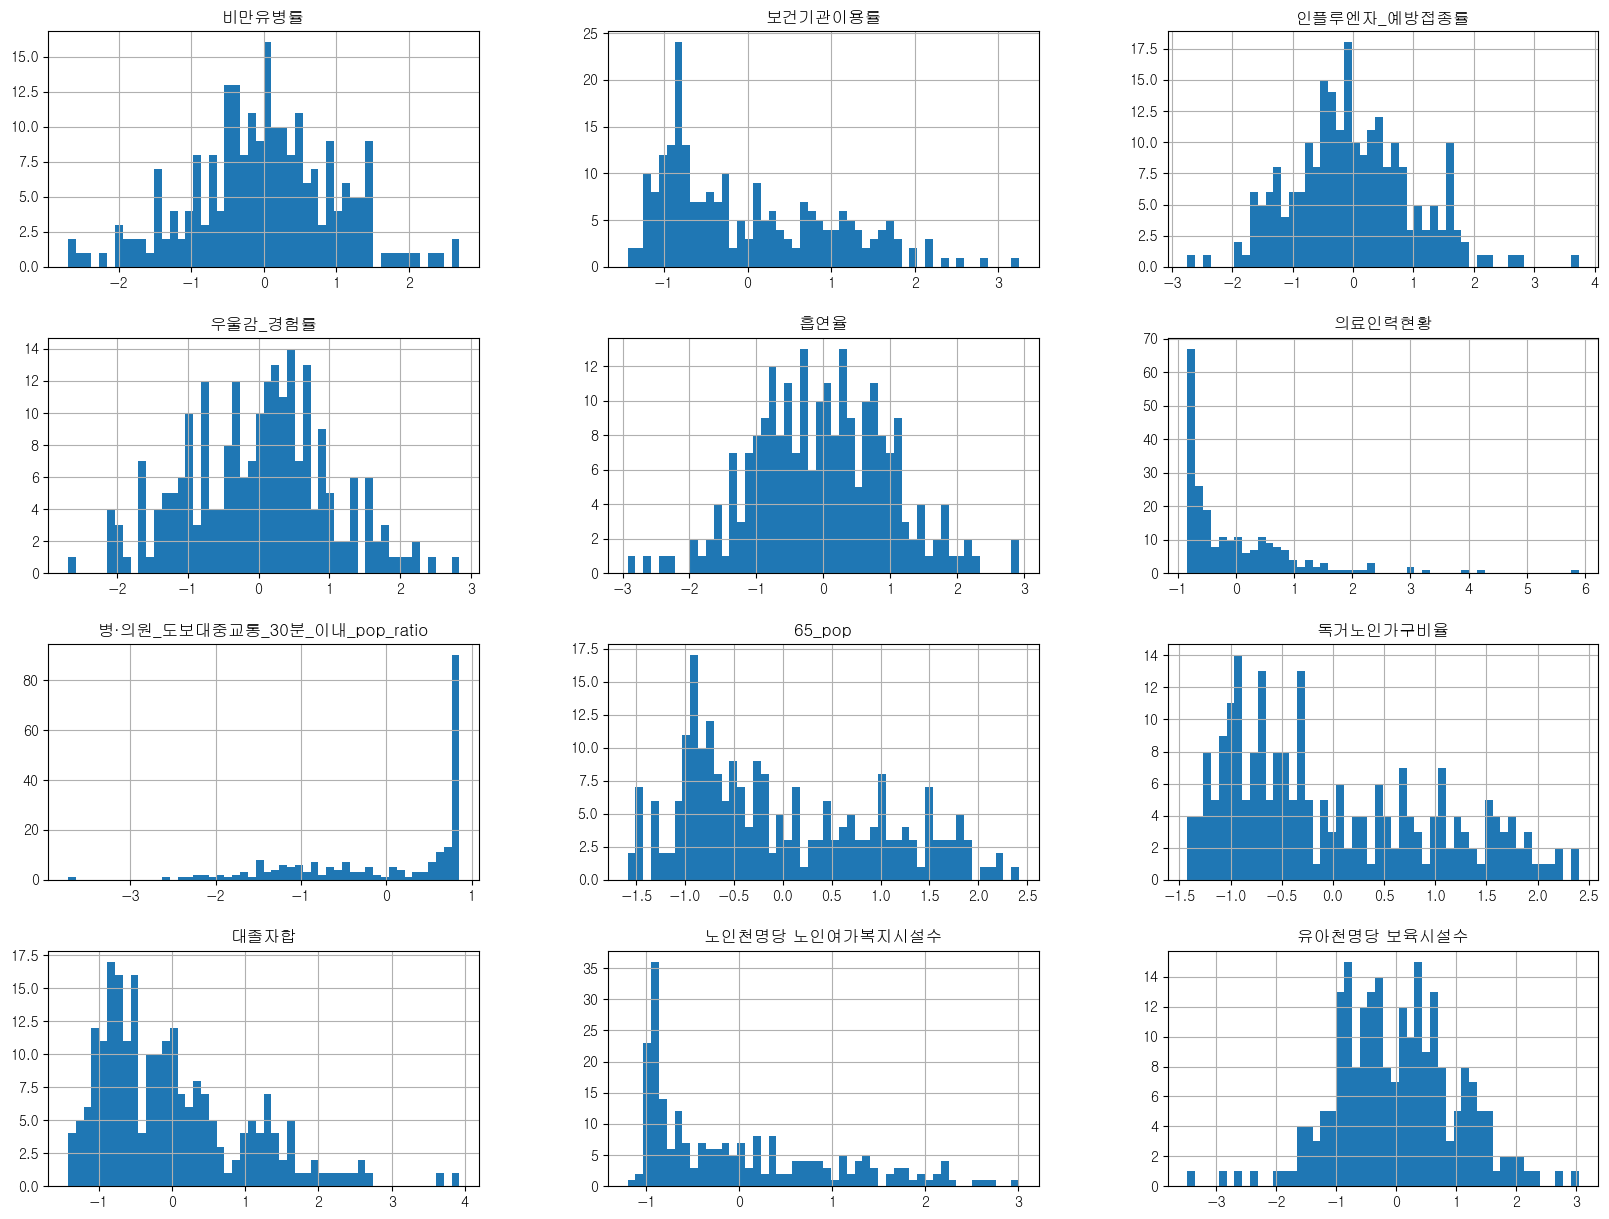

In [169]:
data_for_test.iloc[:,1:13].hist(bins=50, figsize=(20,15))

array([[<AxesSubplot:title={'center':'사회복지예산비중'}>,
        <AxesSubplot:title={'center':'천명당의료기관병상수'}>,
        <AxesSubplot:title={'center':'중학교_도보대중교통_30분_이내_pop_ratio'}>],
       [<AxesSubplot:title={'center':'고등학교_도보대중교통_30분_이내_pop_ratio'}>,
        <AxesSubplot:title={'center':'초등학교_도보대중교통_30분_이내_pop_ratio'}>,
        <AxesSubplot:title={'center':'A.농업,임업및어업_pop'}>],
       [<AxesSubplot:title={'center':'C.제조업_pop'}>,
        <AxesSubplot:title={'center':'첨단산업_pop'}>,
        <AxesSubplot:title={'center':'공공기관_pop'}>],
       [<AxesSubplot:title={'center':'농업어업임업_부가가치'}>,
        <AxesSubplot:title={'center':'제조업_부가가치'}>,
        <AxesSubplot:title={'center':'생활서비스업_부가가치'}>]], dtype=object)

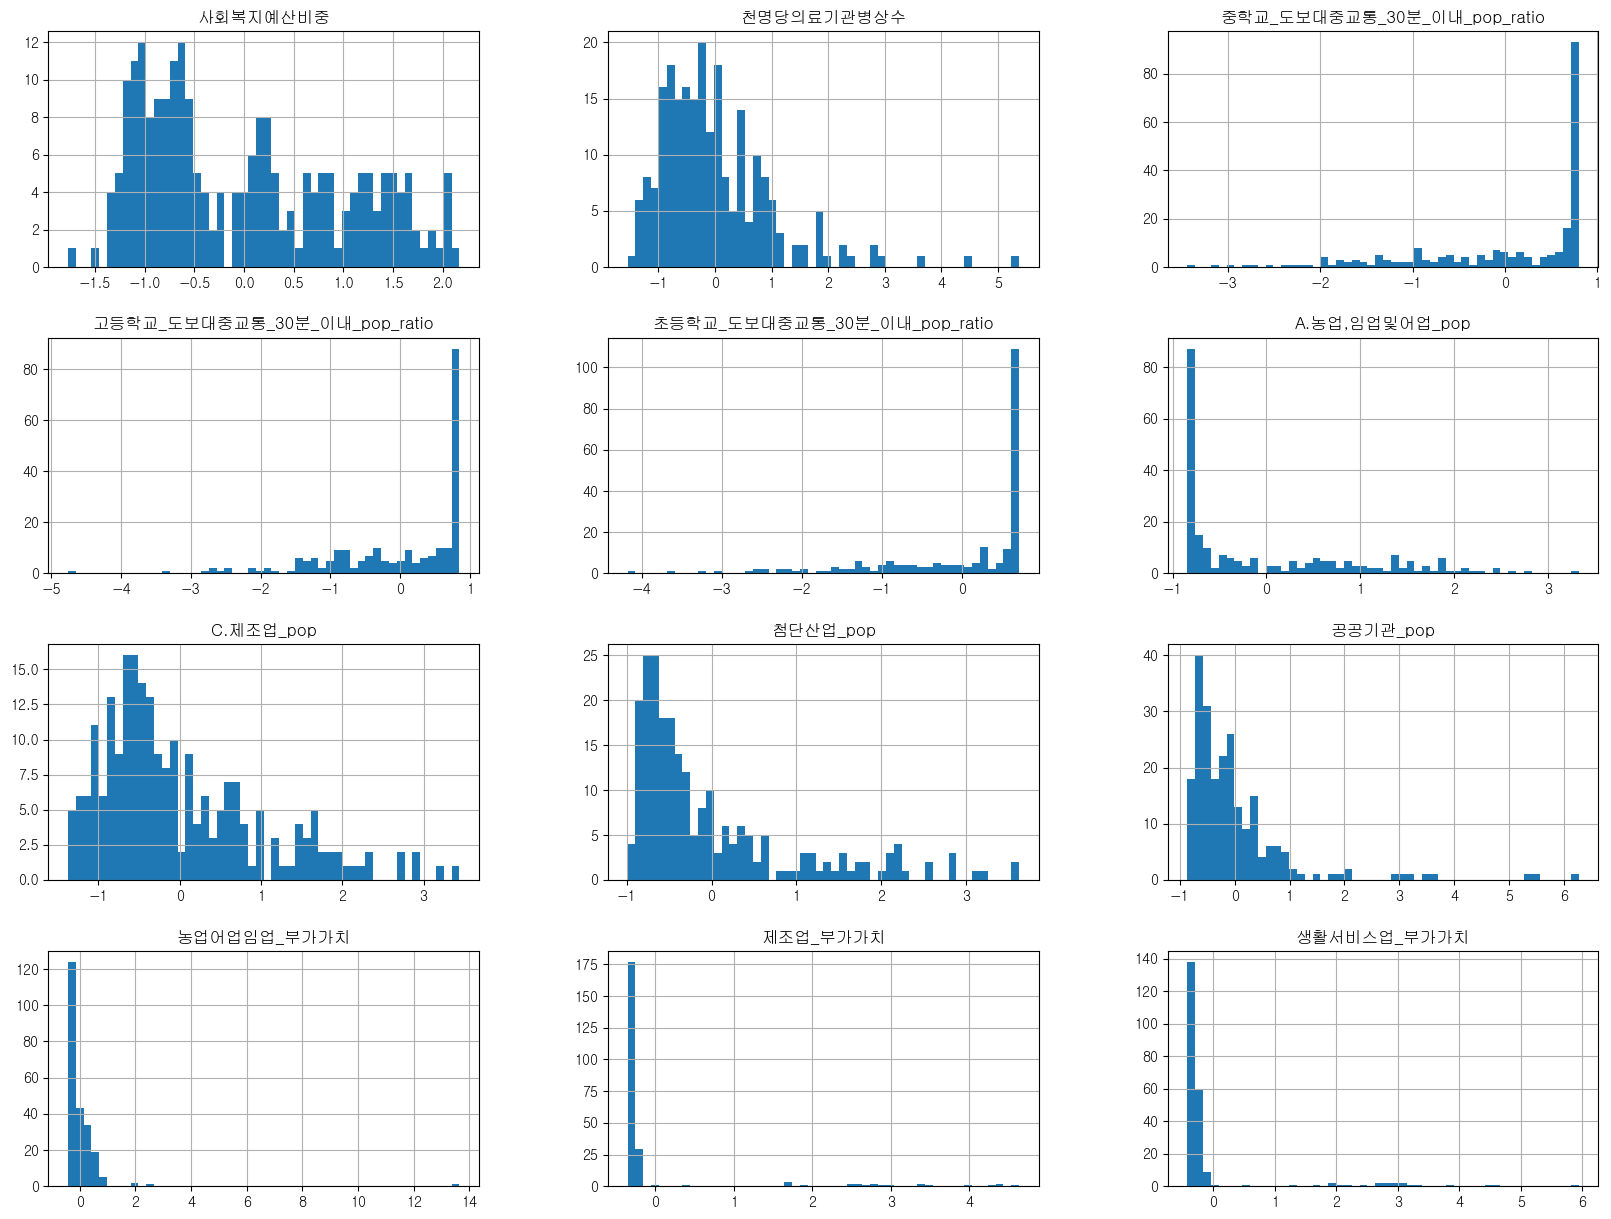

In [170]:
data_for_test.iloc[:,13:25].hist(bins=50, figsize=(20,15))

array([[<AxesSubplot:title={'center':'특허3개년평균'}>,
        <AxesSubplot:title={'center':'1인당_자동차등록대수'}>,
        <AxesSubplot:title={'center':'사업체수'}>],
       [<AxesSubplot:title={'center':'노후주택비율'}>,
        <AxesSubplot:title={'center':'빈집비율'}>,
        <AxesSubplot:title={'center':'실업률'}>],
       [<AxesSubplot:title={'center':'청년고용률_2022.1/2'}>,
        <AxesSubplot:title={'center':'재정자립도(세입과목개편후)'}>,
        <AxesSubplot:title={'center':'녹지율'}>],
       [<AxesSubplot:title={'center':'1인당생활폐기물'}>,
        <AxesSubplot:title={'center':'인구십만명당_문화기반시설수'}>,
        <AxesSubplot:title={'center':'도로포장률'}>]], dtype=object)

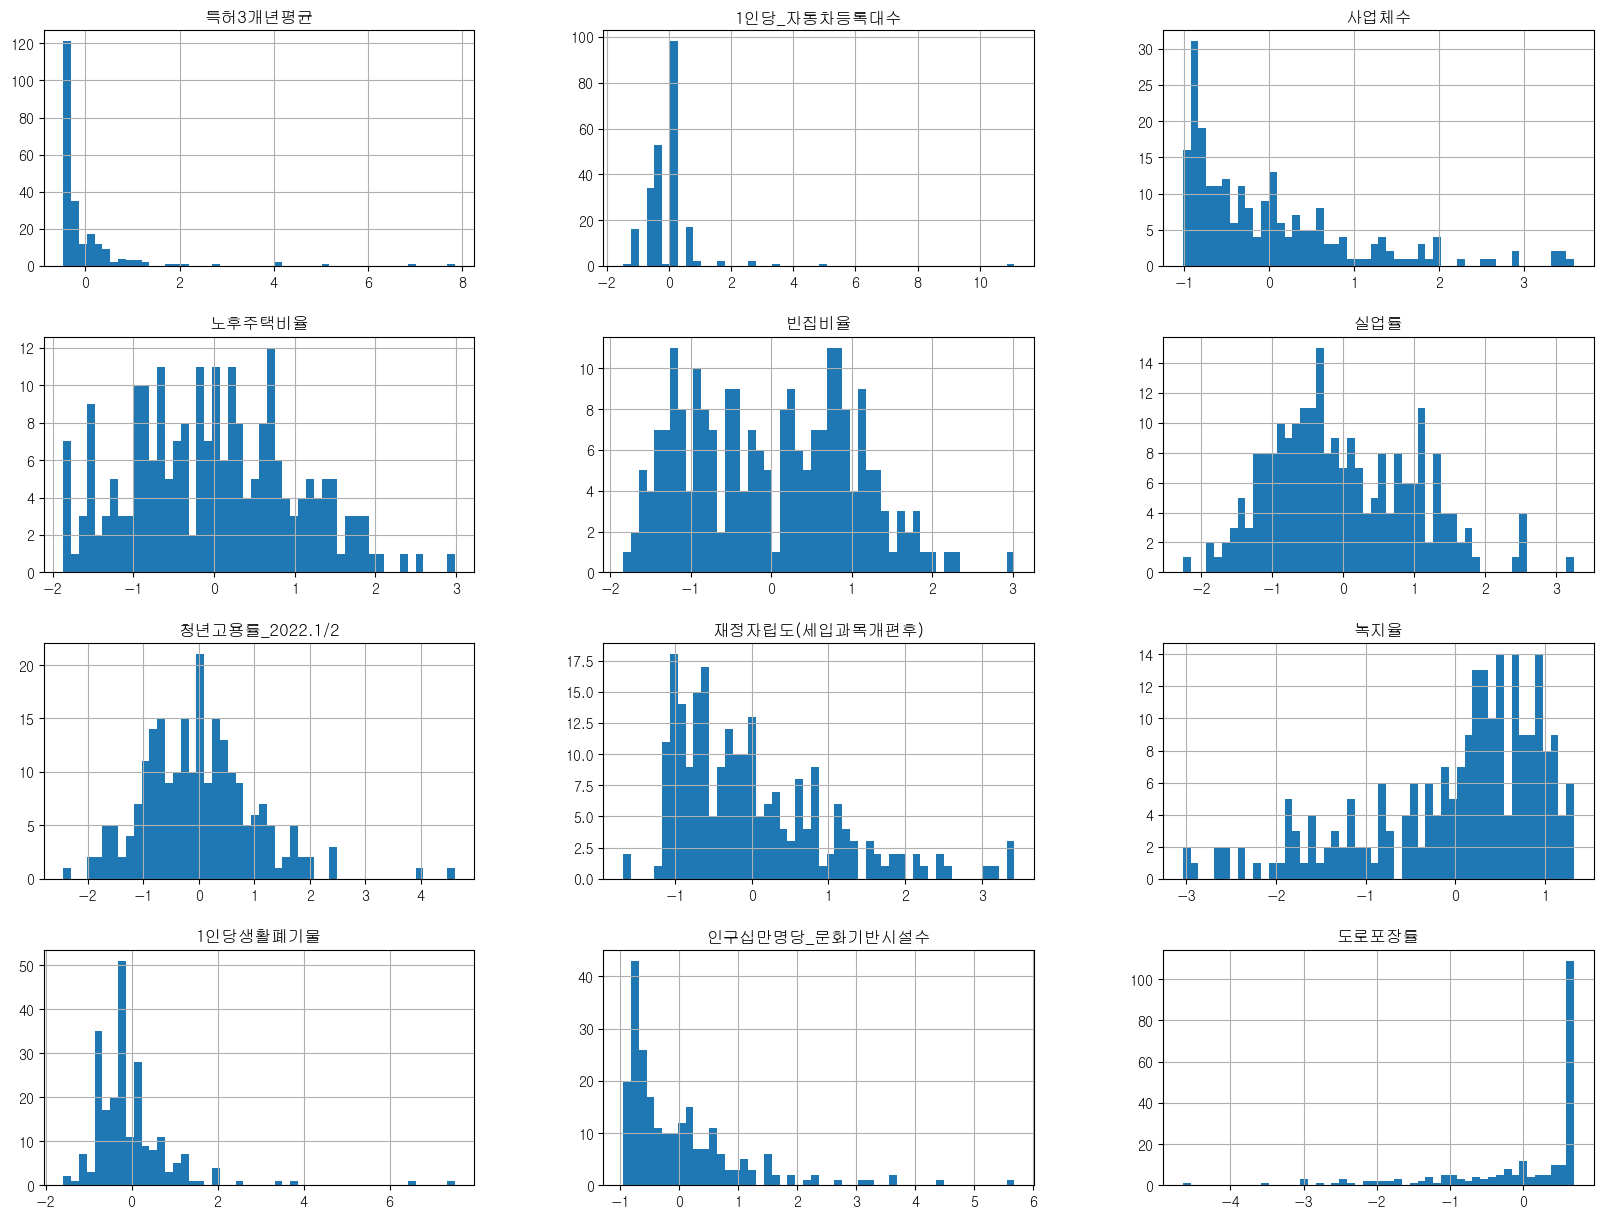

In [171]:
data_for_test.iloc[:,25:37].hist(bins=50, figsize=(20,15))

array([[<AxesSubplot:title={'center':'철도역_도보대중교통_30분_이내_pop_ratio'}>,
        <AxesSubplot:title={'center':'통근통학1시간미만'}>],
       [<AxesSubplot:title={'center':'순이동_2021'}>,
        <AxesSubplot:title={'center':'화재발생건수'}>]], dtype=object)

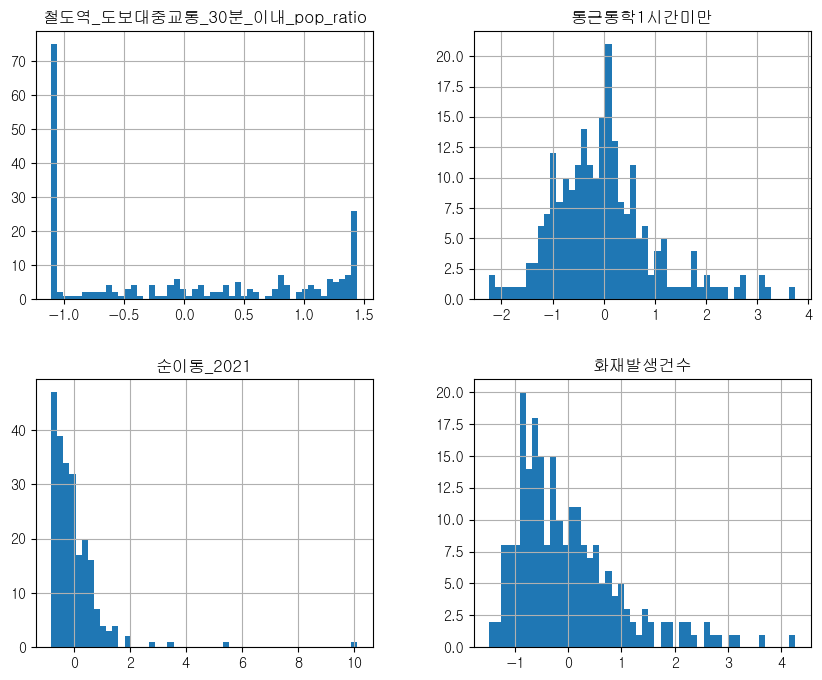

In [172]:
data_for_test.iloc[:,37:49].hist(bins=50, figsize=(10,8))